In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
print(os.getcwd())

/Users/megan/Downloads


In [2]:
train=pd.read_csv('train.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Voor de uitwerkingen gebruik ik alleen de train dataset
# Get row and column count
train.shape

(103904, 25)

In [5]:
# Get a snapshot of data
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [9]:
# Replace spaces in the column names with underscore
train.columns = [c.replace(' ', '_') for c in train.columns]

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Gate_location                      103904 non-null  int64  
 10  Food_and_drink                     103904 non-null  int64  
 11  Online_boarding                    1039

In [11]:
#Vervang codering voor cijfers
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [12]:
train.head(5)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


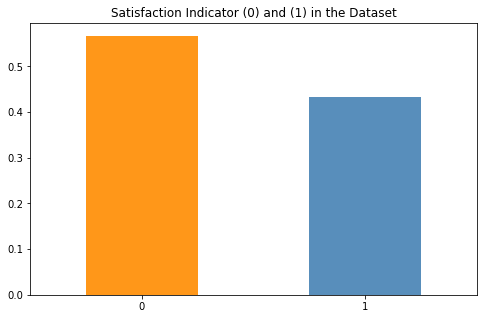

In [13]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

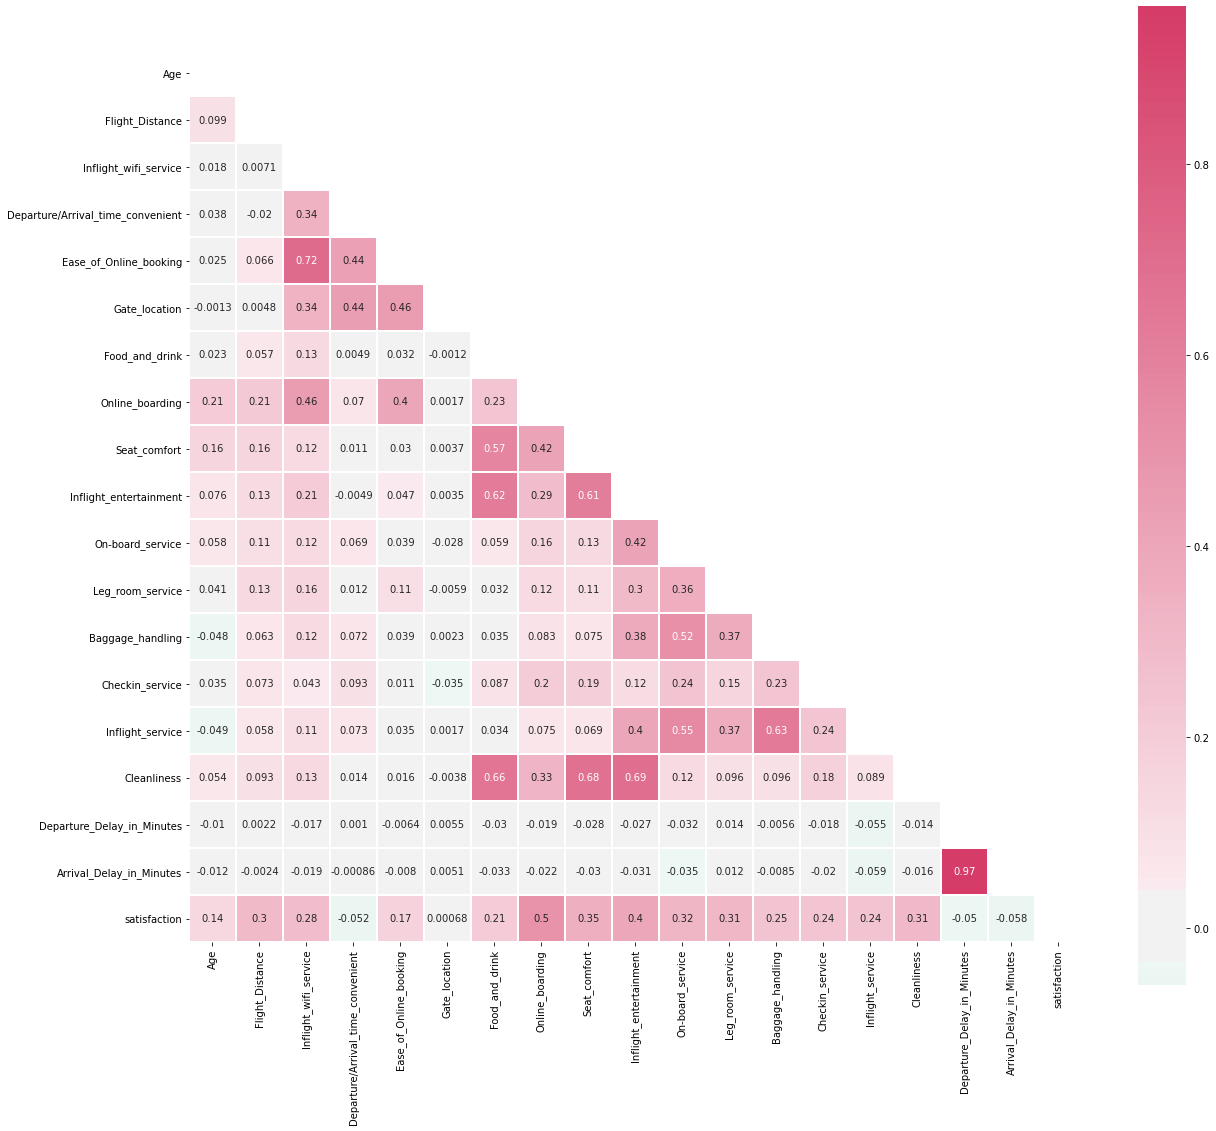

In [14]:
#Correlatie matrix; let op de hoge correlatie tussen Departure_Delay en Arrival_Delay. Is niet zo verbazingwekkend;
#Blijkbaar meten deze hetzelfde, dus kun je een van beide verwijderen. Eerst kijken waar we de 
#meeste missing values hebben

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [15]:
def missing_percent(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/ len(df) * 100, 2)
    return pd.concat([total, percent], axis = 1, keys = ['Total', '%'])

In [16]:
#Het zal duidelijk zijn: Arrival_Delay wordt verwijderd.
missing_percent(train)

,Total,%
Arrival_Delay_in_Minutes,310,0.3
satisfaction,0,0.0
Food_and_drink,0,0.0
Customer_Type,0,0.0
Age,0,0.0
Type_of_Travel,0,0.0
Class,0,0.0
Flight_Distance,0,0.0
Inflight_wifi_service,0,0.0
Departure/Arrival_time_convenient,0,0.0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Gate_location                      103904 non-null  int64  
 10  Food_and_drink                     103904 non-null  int64  
 11  Online_boarding                    1039

In [18]:
#Kijk eens naar de verdeling van de data (gemiddelde, modus, mediaan, verdeling)

Text(0.5, 1.0, 'Flight_Distance Distribution')

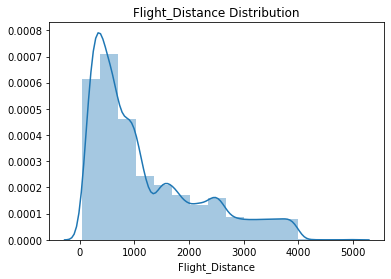

In [19]:
x = train['Flight_Distance']
sns.distplot(x, bins = 15)
plt.title('Flight_Distance Distribution')

Text(0.5, 1.0, '/Age')

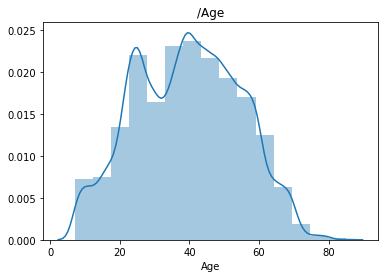

In [20]:
x = train['Age']
sns.distplot(x, bins = 15)
plt.title('/Age')

Text(0.5, 1.0, 'Departure_Delay_in_Minutes')

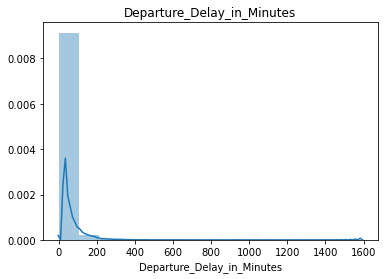

In [21]:
x = train['Departure_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Departure_Delay_in_Minutes')

In [22]:
#De variabelen met gemiddelde en de standaardafwijking; let op Flight_Distance
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight_Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight_wifi_service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival_time_convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease_of_Online_booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate_location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food_and_drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online_boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat_comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight_entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [23]:
#Op basis van deze data kun je overwegen om een aantal variabelen te transformeren. We gaan
#evenwel de t-toetsen doen. Is er verschil tussen tevreden en ontevreden passagiers wat betreft
#Flight Distance, Departure Delay en Age?
import math
import statistics
import scipy.stats
from scipy import stats

In [24]:
# Maak eerst een opsplitsing in de data tussen tevreden en ontevreden passagiers
tevreden = train.loc[train['satisfaction'] == 1]
ontevreden = train.loc[train['satisfaction'] == 0]



In [25]:
# Voer een t-test uit of er een verschil is in Flight Distance
stats.ttest_ind(tevreden.Flight_Distance,ontevreden.Flight_Distance)

# H0: Er is geen verschil tussen deze groepen
# p < 0.05: H0 wordt verworpen dus er is wél een significant verschil in vliegafstand tussen tevreden
#en ontevreden  passagiers

Ttest_indResult(statistic=100.91789690126286, pvalue=0.0)

In [26]:
stats.ttest_ind(tevreden.Departure_Delay_in_Minutes,ontevreden.Departure_Delay_in_Minutes)



Ttest_indResult(statistic=-16.297008708001417, pvalue=1.2293455496744246e-59)

In [27]:
stats.ttest_ind(tevreden.Age,ontevreden.Age)



Ttest_indResult(statistic=44.63618618810881, pvalue=0.0)

In [28]:
#Dan is het nu tijd voor de ANOVA: we gaan drie groepen qua leeftijd met elkaar vergelijken,
#namelijk de klasse die men vliegt is. Is er een verschil in gemiddelde leeftijd per klasse; de klassen
#zijn gehercodeerd (business = 3, eco plus = 2 en eco = 1)
from scipy.stats import f_oneway

In [29]:
train.head(15)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,1
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,0
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,0


In [30]:
stats.f_oneway(train['Age'][train['Class'] == 1],
               train['Age'][train['Class'] == 2],
               train['Age'][train['Class'] == 3])

/Users/dickheinhuis/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [31]:
#Dat is een duidelijk verschil tussen de drie groepen, maar we weten nog niet welke groepen verschillen
#t toetsen moeten dan duidelijkheid brengen, maar we hebben dan een correctie nodig
#(de details komen later in de minor nog eens aan de orde)
# We kiezen hier voor Tukey's correctie; de output laat zien dat de verschillen tussen alle klassen
# significant (p=0.001)zijn

import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(train['Age'], train['Class'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
Business,Eco,-4.4101,0.001,-4.6361,-4.1841,True
Business,Eco Plus,-2.9198,0.001,-3.3544,-2.4852,True
Eco,Eco Plus,1.4903,0.001,1.0539,1.9267,True


In [34]:
#Eigenlijk moeten we eerst nog andere testen doen, voordat we een ANOVA mogen doen; bijvoorbeeld of de homogeniteit van de 
#variantie in de drie groepen min of meer gelijk is
#Dat is Levene's test; ook die komt later terug, maar voor de fijnproevers:
stats.levene(train['Age'][train['Class'] == 'Eco'],
             train['Age'][train['Class'] == 'Eco Plus'],
             train['Age'][train['Class'] == 'Business'])

LeveneResult(statistic=2704.7741588413473, pvalue=0.0)

In [38]:
#Dan tenslotte de chi square. Is er een verschil in tevredenheid per klasse die men vliegt?
#Eerst een kruistabel; het is duidelijk dat de Business class passagiers duidelijk positiever zijn
crosstab = pd.crosstab(train["satisfaction"], train["Class"])

crosstab


Class,Business,Eco,Eco Plus
satisfaction,,,
0,15185,38044,5650
1,34480,8701,1844


In [39]:
#Nu de chi square; mooie output is het niet,  maar chi square is 26471, hetgeen significant is: 0.0
#Het derde cijfer is aantal vrijheidsgraden, de array geeft de expected scores (uitgaande van geen verschil)
stats.chi2_contingency(crosstab)

(26471.862944492277,
 0.0,
 2,
 array([[28143.53186595, 26488.86332576,  4246.60480828],
        [21521.46813405, 20256.13667424,  3247.39519172]]))